# Assignment 3 - MDR

## Submitted by:
- Qazi Umer Jamil
- NUST Regn No 317920
- RIME 19

## Assignment:
- Please get any data of ECG, EEG and EMG from the internet. Write your own code to extract respiration signals from the data.
- ECG data is already given as part of Assignment 2. To download EMG data, see lecture 5 slides. EEG data can be acquired from:
http://www.bbci.de/competition/.
- Please submit a report with code and results of the extracted data

# Importing libraries

In [1]:
import os
import h5py
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.signal import periodogram
from scipy.misc import electrocardiogram
from scipy.interpolate import splrep, splev
from scipy.signal import detrend, find_peaks
from mne.filter import filter_data, resample

mpl.style.use('ggplot')

# Respiratory signal from EEG

## Dataset

- BCI Competition 2008 – Graz dataset A (http://bbci.de/competition/iv/desc_2a.pdf) is used. 
- This data set consists of EEG data from 9 subjects.
- The signals were sampled with 250 Hz.
- The signal variable contains 25 channels (the first 22 are EEG and the last 3 are EOG signals).

## Importing the dataset

In [2]:
filepath = 'A01T_slice.mat'
arrays = {}
f = h5py.File(filepath)
for k, v in f.items():
    arrays[k] = np.array(v)

The arrays variable contains two variable, image and type. Image var contains the signals and type var contains the classes and header information. Our main concern is getting an EEG signal, so we will select it from the array.

In [3]:
arrays["image"].shape

(288, 25, 1000)

Here, 288 is the no trials per session, 25 shows the number of channels (22 EEg, 3 EOG), and the last var contains the respective EEG signal value.

Lets select trial 10 and electrode 20.

In [4]:
EEG_signal = arrays["image"][10][20]

## Plotting the signal

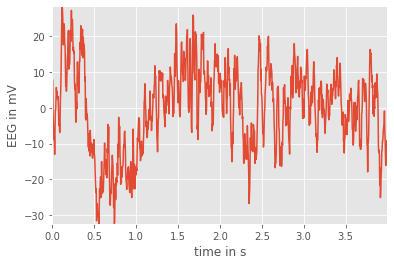

In [5]:
fs = 250
time = np.arange(EEG_signal.size) / fs
plt.plot(time, EEG_signal)
plt.xlabel("time in s")
plt.ylabel("EEG in mV")
plt.xlim(min(time), max(time))
plt.ylim(min(EEG_signal), max(EEG_signal))
plt.show()

## Applying a bandpass filter of range 0.1-0.6 Hz

Setting up band-pass filter from 0.1 - 0.6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 0.60 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.60 Hz)
- Filter length: 8251 samples (33.004 sec)

Using filter length: 8251
Smart-padding with:  999 samples on each edge
FFT block length:   16875


<ipython-input-6-acfc0bd9b701>:3: RuntimeWarning: filter_length (8251) is longer than the signal (1000), distortion is likely. Reduce filter length or filter a longer signal.
  EEG_signal_filtered = filter_data(EEG_signal, fs, badpass_low, bandpass_high, verbose=1)


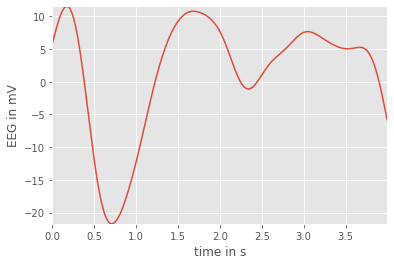

In [6]:
badpass_low, bandpass_high = 0.1, 0.6
EEG_signal = EEG_signal.astype("float64")
EEG_signal_filtered = filter_data(EEG_signal, fs, badpass_low, bandpass_high, verbose=1)

fs = 250
time = np.arange(EEG_signal_filtered.size) / fs
plt.plot(time, EEG_signal_filtered)
plt.xlabel("time in s")
plt.ylabel("EEG in mV")
plt.xlim(min(time), max(time))
plt.ylim(min(EEG_signal_filtered), max(EEG_signal_filtered))
plt.show()

## Power spectrum

At this stage, we are not sure if the respiration signal is present or not, therefore we will take the power spectrum of the signal.

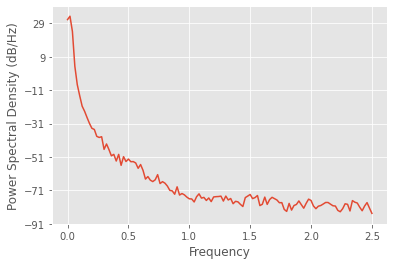

In [7]:
plt.psd(EEG_signal_filtered, 250, 1/0.2 ) 
plt.show()

## Conclusion

We can see above that there is no peak and 0.6 Hz, therefore we can say that there is no respiration signal present in this EEG signal.

I also tried other EEG signals from the dataset and the results were same as above. 

# Respiratory signal from EMG

## Dataset

- The dataset was obtained from https://www.rami-khushaba.com/electromyogram-emg-repository.html
- The dataset contains info about detecting individual and combined fingers movements. 
- The dataset contains 2 channels and 10 classes.
- This dataset consists of EMG data from 8 subjects.
- The signals were sampled with 4000 Hz.
- Further info: https://onedrive.live.com/?authkey=%21As%5FiNPKzgU6LJCU&id=AAA78954F15E6559%21295&cid=AAA78954F15E6559

## Importing the dataset

In [8]:
df = pd.read_csv (r'HC-1_a.csv')
df = df.to_numpy()
df = df.transpose()

The df variable contains EMG signal of Hand Close movement on two channels. We will select the first channel for this task.

In [9]:
EMG_signal  = df[0]

## Plotting the signal

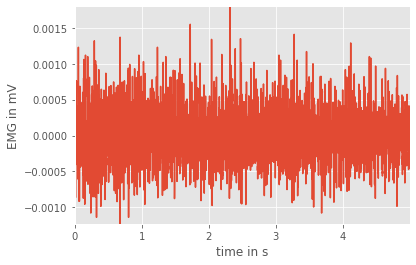

In [10]:
fs = 4000
time = np.arange(EMG_signal.size) / fs
plt.plot(time, EMG_signal)
plt.xlabel("time in s")
plt.ylabel("EMG in mV")
plt.xlim(min(time), max(time))
plt.ylim(min(EMG_signal), max(EMG_signal))
plt.show()

## Applying a bandpass filter of range 0.1-0.6 Hz

Setting up band-pass filter from 0.1 - 0.6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 0.60 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.60 Hz)
- Filter length: 132001 samples (33.000 sec)

Using filter length: 132001


<ipython-input-11-b1bbee100d7c>:3: RuntimeWarning: filter_length (132001) is longer than the signal (20000), distortion is likely. Reduce filter length or filter a longer signal.
  EMG_signal_filtered = filter_data(EMG_signal, fs, badpass_low, bandpass_high, verbose=1)


Smart-padding with:  19999 samples on each edge
FFT block length:   270000


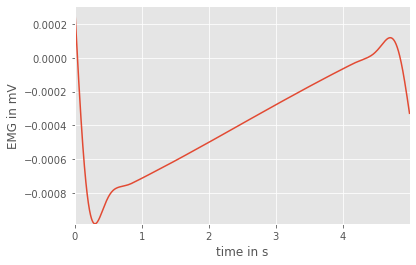

In [11]:
badpass_low, bandpass_high = 0.1, 0.6
EMG_signal = EMG_signal.astype("float64")
EMG_signal_filtered = filter_data(EMG_signal, fs, badpass_low, bandpass_high, verbose=1)

#time = np.arange(EMG_signal_filtered.size) / fs
plt.plot(time, EMG_signal_filtered)
plt.xlabel("time in s")
plt.ylabel("EMG in mV")
plt.xlim(min(time), max(time))
plt.ylim(min(EMG_signal_filtered), max(EMG_signal_filtered))
plt.show()

## Power spectrum

At this stage, we are not sure if the respiration signal is present or not, therefore we will take the power spectrum of the signal.

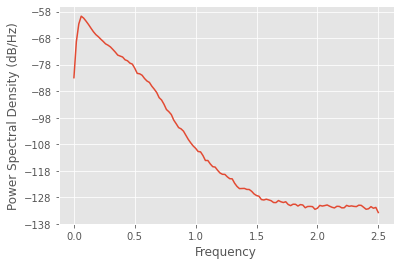

In [12]:
plt.psd(EMG_signal, 250, 1/0.2 ) 
plt.show()

## Conclusion

We can see above that there is no peak and 0.6 Hz, therefore we can say that there is no respiration signal present in this EEG signal.

I also tried other EMG signals from the dataset and the results were same as above. 

# Respiratory signal extraction from ECG

## Loading the data

In [13]:
#For this, I am using the ECG signal provided with scipy library
ECG_signal = electrocardiogram()

## Plotting the signal

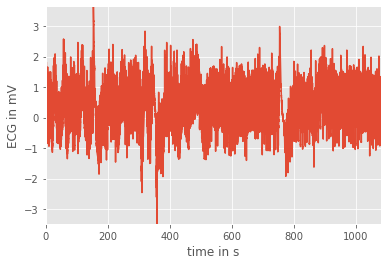

In [14]:
sf = 100
time = np.arange(ECG_signal.size) / sf
plt.plot(time, ECG_signal)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.xlim(min(time), max(time))
plt.ylim(min(ECG_signal), max(ECG_signal))
plt.show()

For the following part, I took help/notes from https://gist.github.com/raphaelvallat/55624e2eb93064ae57098dd96f259611

In [15]:
sf_ori = 360
fs = 100 
dsf = fs / sf_ori

ECG_signal = resample(ECG_signal, dsf)
ECG_signal_filtered = filter_data(ECG_signal, fs, 2, 30, verbose=0)

# Selecting only a 20 seconds window from the signal
window = 20
start = 160
ECG_signal_filtered = ECG_signal_filtered[int(start*fs):int((start+window)*fs)]

## Detecting RR peaks

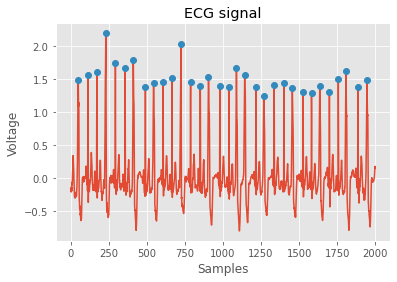

In [16]:
rr, _ = find_peaks(ECG_signal_filtered, distance=40, height=0.5)

plt.plot(ECG_signal_filtered)
plt.plot(rr, ECG_signal_filtered[rr], 'o')
plt.title('ECG signal')
plt.xlabel('Samples')
_ =plt.ylabel('Voltage')

## Power spectrum

Mean HR: 98.49 bpm
Maximum frequency: 0.54 Hz


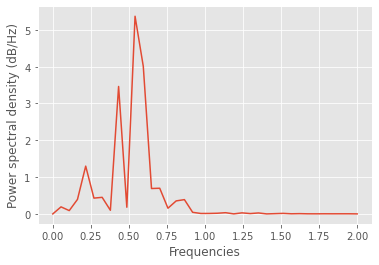

In [17]:
# Finding the R-R interval in milliseconds
rr = (rr / sf) * 1000
rri = np.diff(rr)

# Interpolate and compute Heart Rate
def interp_cubic_spline(rri, sf_up=4):
    rri_time = np.cumsum(rri) / 1000.0
    time_rri = rri_time - rri_time[0]
    time_rri_interp = np.arange(0, time_rri[-1], 1 / float(sf_up))
    tck = splrep(time_rri, rri, s=0)
    rri_interp = splev(time_rri_interp, tck, der=0)
    return rri_interp

sf_up = 4
rri_interp = interp_cubic_spline(rri, sf_up) 
hr = 1000 * (60 / rri_interp)
print('Mean HR: %.2f bpm' % np.mean(hr))

# Detrend and normalize the heart rate signal
edr = detrend(hr)
edr = (edr - edr.mean()) / edr.std()

freqs, psd = periodogram(edr, sf_up)
plt.plot(freqs, psd)
plt.ylabel('Power spectral density (dB/Hz)')
plt.xlabel('Frequencies')
print('Maximum frequency: %.2f Hz' % freqs[np.argmax(psd)])

## Conclusion

As we can see, there is a peak at 0.54 Hz, showing the presence of respiratory signal.